In [2]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import importlib
from tqdm.auto import tqdm
matplotlib.rcParams['figure.figsize']=5,5
from time import sleep
from IPython.display import clear_output

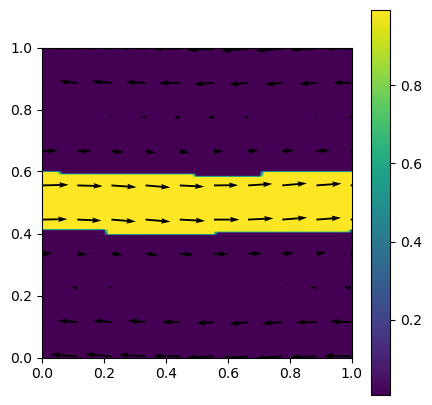

In [11]:
importlib.reload(importlib.import_module('fluid2D'))
from fluid2D import *;import fluid2D

fluid2D.boundary_xp='periodic'
fluid2D.boundary_xm='periodic'
fluid2D.boundary_yp='periodic'
fluid2D.boundary_ym='periodic'
fluid2D.timeStep=0.005
from fluid2D import *
viscosity=0


xy=get_positions()
u=np.zeros_like(xy)
u+=taylor_green_vortex()*.3
u+=laminar_flow()*1
dy=xy[...,1]-.5
dye=np.where(dy**2<.1**2,1,0)
p=np.ones(u.shape[:-1])
time=0


def draw():
    plt.gcf().add_subplot(1,1,1)
    show_image(dye)
    plt.colorbar()
    show_quiver(xy,u)
def update_graph():
    clear_output(wait=True)
    draw()
    plt.show()
    sleep(0.01)

try:
    for _iter in range(6000):
        if _iter%10==0:
            update_graph()
        
        dye=advect(dye,u)
        dye=(np.tanh(np.clip(dye-.5,-.5,.5)*5)+1)/2
        u=advect_velocity_MacCormack(u)
        
        u=diffuse(u,amount=viscosity*timeStep,nIter=5)
        
        #u,p=solve_pressure_fast(u,p)
        u,p=solve_pressure(u,density=1,nIter=1,old_pressure=p)
        
        time=time+timeStep
except KeyboardInterrupt:
    pass